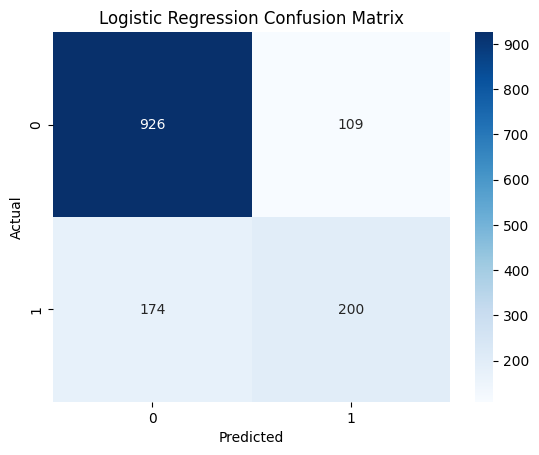

C:\Users\User\AppData\Local\Temp\ipykernel_2680\652221067.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette="viridis")


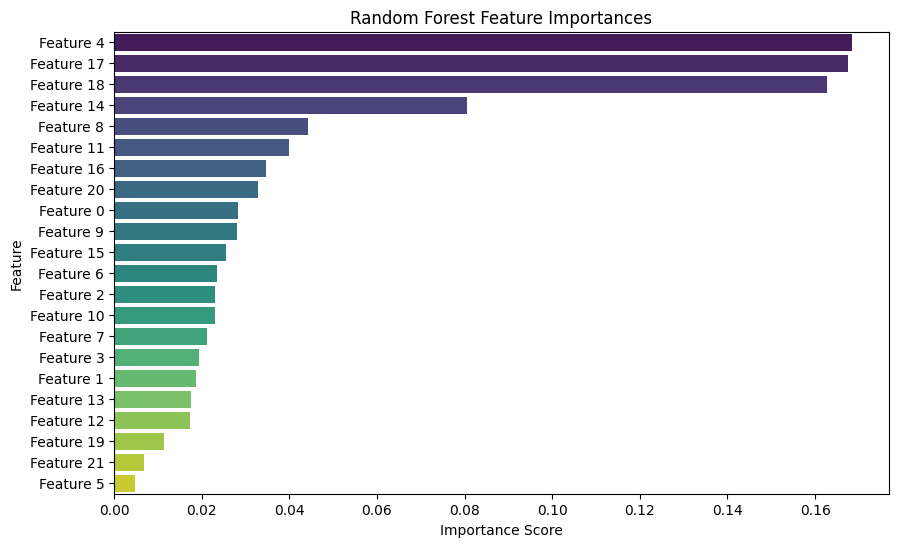

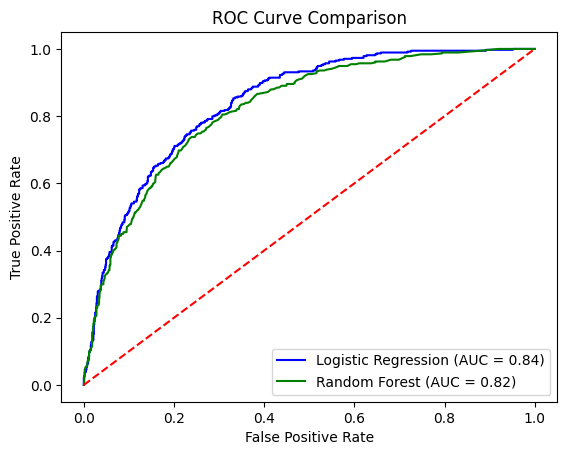

In [59]:
# Confusion matrix heatmap
cm = log_results['ConfusionMatrix']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve comparison
fpr_log, tpr_log, _ = roc_curve(y_test, log_results['Probabilities'])
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_results['Probabilities'])
roc_auc_rf = auc(fpr_rf, tpr_rf)
# Feature Importance Plot for Random Forest

importances = rf_results['Model'].feature_importances_
feature_names = X_train.columns if hasattr(X_train, "columns") else [f"Feature {i}" for i in range(X_train.shape[1])]

# Sort by importance
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette="viridis")
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

plt.plot(fpr_log, tpr_log, color='blue', label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()